In [5]:
## kaggle - dataset에서 mnist검색
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
from sklearn.linear_model import LogisticRegression
import mglearn 
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv("./data/digit-recognizer/train.csv")



In [6]:
##################################################################################################
# train data와 test data 생성 
# 정규화 작업
scaler= MinMaxScaler()
train_num = int(data_df.shape[0]*0.8) 
# scaler.data_max_  # 가지고있는 데이터의 최대값
# scaler.data_min_  # 최대, 최소값 가지고 scaling
x_data = data.drop("label",axis=1,inplace=False)
x_data = scaler.fit_transform(x_data)

# 데이터 분할해 x data 생성 - 80:20
train_x_data = x_data[:train_num]  # nparray에서 자른 값 ->  뒤의 값이 exclusive 해서 16000개
test_x_data = x_data[train_num:]

# 학습용, 테스트용 y data 생성 -> one hot encoding
# one hot encoding으로 전환하는 방법 2가지

sess = tf.Session()
train_y_data = sess.run(tf.one_hot(data_df.loc[:train_num-1,"label"], 10)) # 원래 1차원 자료가 one-hot encoding 적용하면 2차원 자료가 된다.
# sess.run(tf.one_hot(bmi_df.loc[:train_num-1,"label"], 3)).shape # data frame이라 loc 사용하면 뒤부분 inclusive하다 -> train_num -1 빼줘야 함! 
test_y_data = sess.run(tf.one_hot(data_df.loc[train_num:,"label"], 10))

#################################################################################################

# placeholder
X = tf.placeholder(shape=[None,784],dtype=tf.float32)
Y = tf.placeholder(shape=[None,10],dtype=tf.float32)

# W, b
W = tf.Variable(tf.random_normal([784,10]),name="weight")
b = tf.Variable(tf.random_normal([10]),name="bias")  # 1차원으로 3개

# H
logit = tf.matmul(X,W)+b 
H = tf.nn.softmax(logit) 

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,   # version2로 해야 정확
                                                                labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session
sess.run(tf.global_variables_initializer())

    
# 학습
train_epoch = 300  # 전체를 30번 할거다 (100개씩 잘라서 전체 도는거를 30번 하겠다.)
batch_size = 100 # 한번에 몇개를 학습할거니? 일반적으로 100개씩 하면 적당함

for step in range(train_epoch):
    num_of_iter = int(train_num/batch_size)
    cost_val = 0
    
    for i in range(num_of_iter):
        #batch_x, batch_y = mnist.train.next_batch(batch_size)    
        batch_x = train_x_data[batch_size*i:batch_size*(i+1)]
        batch_y = train_y_data[batch_size*i:batch_size*(i+1)]
        
        _, cost_val = sess.run([train,cost],
                              feed_dict={X:batch_x,
                                        Y:batch_y})
    if step%30==0:
        print("Cost값은:{}".format(cost_val))



Cost값은:2.346472978591919
Cost값은:0.49307265877723694
Cost값은:0.431395024061203
Cost값은:0.4014136493206024
Cost값은:0.3832317292690277
Cost값은:0.37106460332870483
Cost값은:0.36240267753601074
Cost값은:0.3560386598110199
Cost값은:0.35131314396858215
Cost값은:0.3477976322174072


In [7]:
# 학습이 종료되었으니 정확도를 측정하자! 
predict = tf.argmax(H,axis=1)
correct = tf.equal(predict, tf.argmax(Y,axis=1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))

print("정확도는:{}".format(sess.run(accuracy, feed_dict={X:test_x_data,
                                                    Y:test_y_data})))


정확도는:0.9169047474861145


In [8]:
# Prediction
# prediction_data = [[187,78]]
# 예측하기 위해서 다시 scaling한 값 넣어줘야 한다.

# MinMax scaler가 min, max값 가지고 있다.
prediction_data = scaler.transform([[170,70]])

#sess.run(H,feed_dict={X:prediction_data})
result = sess.run(tf.argmax(H,1), feed_dict={X:prediction_data})[0]

    

ValueError: operands could not be broadcast together with shapes (1,2) (784,) (1,2) 

# Kaggle에 제출해 보자!

In [118]:
# 데이터 전체로 학습하자
# 정규화 작업
scaler= MinMaxScaler()

x_data = data.drop("label",axis=1,inplace=False)
x_data = scaler.fit_transform(x_data)

sess = tf.Session()
y_data = sess.run(tf.one_hot(data_df["label"], 10))

#################################################################################################

# placeholder
X = tf.placeholder(shape=[None,784],dtype=tf.float32)
Y = tf.placeholder(shape=[None,10],dtype=tf.float32)

# W, b
W = tf.Variable(tf.random_normal([784,10]),name="weight")
b = tf.Variable(tf.random_normal([10]),name="bias")  # 1차원으로 3개

# H
logit = tf.matmul(X,W)+b 
H = tf.nn.softmax(logit) 

# cost function
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit,   # version2로 해야 정확
                                                                labels=Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

# session
sess.run(tf.global_variables_initializer())

    
# 학습
train_epoch = 300  # 전체를 30번 할거다 (100개씩 잘라서 전체 도는거를 30번 하겠다.)
batch_size = 100 # 한번에 몇개를 학습할거니? 일반적으로 100개씩 하면 적당함

for step in range(train_epoch):
    num_of_iter = int(x_data.shape[0]/batch_size)
    cost_val = 0
    
    for i in range(num_of_iter):
        #batch_x, batch_y = mnist.train.next_batch(batch_size)    
        batch_x = x_data[batch_size*i:batch_size*(i+1)]
        batch_y = y_data[batch_size*i:batch_size*(i+1)]
        
        _, cost_val = sess.run([train,cost],
                              feed_dict={X:batch_x,
                                         Y:batch_y})
    if step%30==0:
        print("Cost값은:{}".format(cost_val))


Cost값은:1.4366788864135742
Cost값은:0.23139512538909912
Cost값은:0.19904983043670654
Cost값은:0.18799999356269836
Cost값은:0.1797056347131729
Cost값은:0.17264489829540253
Cost값은:0.16695469617843628
Cost값은:0.16256456077098846
Cost값은:0.15922415256500244
Cost값은:0.1566733866930008


In [119]:
## 진짜 test 파일로 돌려보자!!

test_data = pd.read_csv("./data/digit-recognizer/test.csv")
#test_data.shape

# MinMax scaler가 min, max값 가지고 있다.
prediction_data = scaler.transform(test_data)

#sess.run(H,feed_dict={X:prediction_data})
result = sess.run(tf.argmax(H,1), feed_dict={X:prediction_data})
result


array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [ ]:
my_df = pd.DataFrame()
my_df["ImageId"] = range(1,test_data.shape[0]+1)
my_df["Label"] = result
my_df

In [ ]:
my_df.to_csv('./data/digit-recognizer/mnist.csv',
                 sep=',',
                 na_rep='NaN', 
                 columns = ['ImageId','Label'], # columns to write
                 index = False) # do not write index

# 내 데이터를 이용해서 해보자!

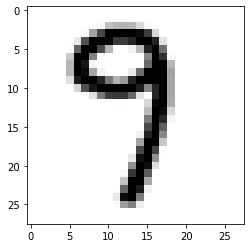

In [144]:
import PIL.Image as img
import numpy as np

# Read image
im = img.open("./data/digit-recognizer/nine.png").convert('L')
im = im.resize([28,28])
# Display image
plt.imshow(im, cmap='gray')
 
# Fetch image pixel data to numpy array
pix = np.array(im)

pix = 255-pix
pix = pix.reshape([1,-1])
#pix


In [145]:

# MinMax scaler가 min, max값 가지고 있다.
prediction_data = scaler.transform(pix)

#sess.run(H,feed_dict={X:prediction_data})
result = sess.run(tf.argmax(H,1), feed_dict={X:prediction_data})
#result
result



array([3], dtype=int64)